In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the data file
df = pd.read_csv('car data.csv')

## Exploring the Data

In [3]:
df.shape

(301, 9)

- The data has 301 Records and 9 features, Let's Explore the fields now

In [4]:
# Checking data types of the Features 
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
# Exploring the Unique values of the feautures
for col in df.columns:
    print({col: df[col].unique()})

{'Car_Name': array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apac

- Fuel_Type, Seller_Type, Transmission & Owner are Categorical Feauture.

In [6]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- There are no null values which is great.

In [7]:
# Cheking the distribution of the Numerical fields
df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']].describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


- Year starting from 2003 and ending at 2018, We want a feature which tells us how old the car is so,

#### Creating a New Variable

In [8]:
Current_Year = 2022

In [9]:
df['No. of Years'] = Current_Year - df['Year']

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


- Car_Name, Year are of no use to use so we'll make a trimmed dataframe

#### Getting Our Final Dataset

In [11]:
car_df = df[['No. of Years','Selling_Price','Present_Price',
             'Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
car_df.head()

,No. of Years,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,8,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,9,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,5,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,11,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,8,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Converting categorical variable into dummy/indicator variables.
car_df=pd.get_dummies(car_df,drop_first=True)
car_df.head()

,No. of Years,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,3.35,5.59,27000,0,0,1,0,1
1,9,4.75,9.54,43000,0,1,0,0,1
2,5,7.25,9.85,6900,0,0,1,0,1
3,11,2.85,4.15,5200,0,0,1,0,1
4,8,4.60,6.87,42450,0,1,0,0,1


In [13]:
# Checking the Correlation between the features
car_df.corr()

,No. of Years,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
No. of Years,1.000000,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,-0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


- It is hard to crunch these many numbers so let's visualaize this using a heat-map.

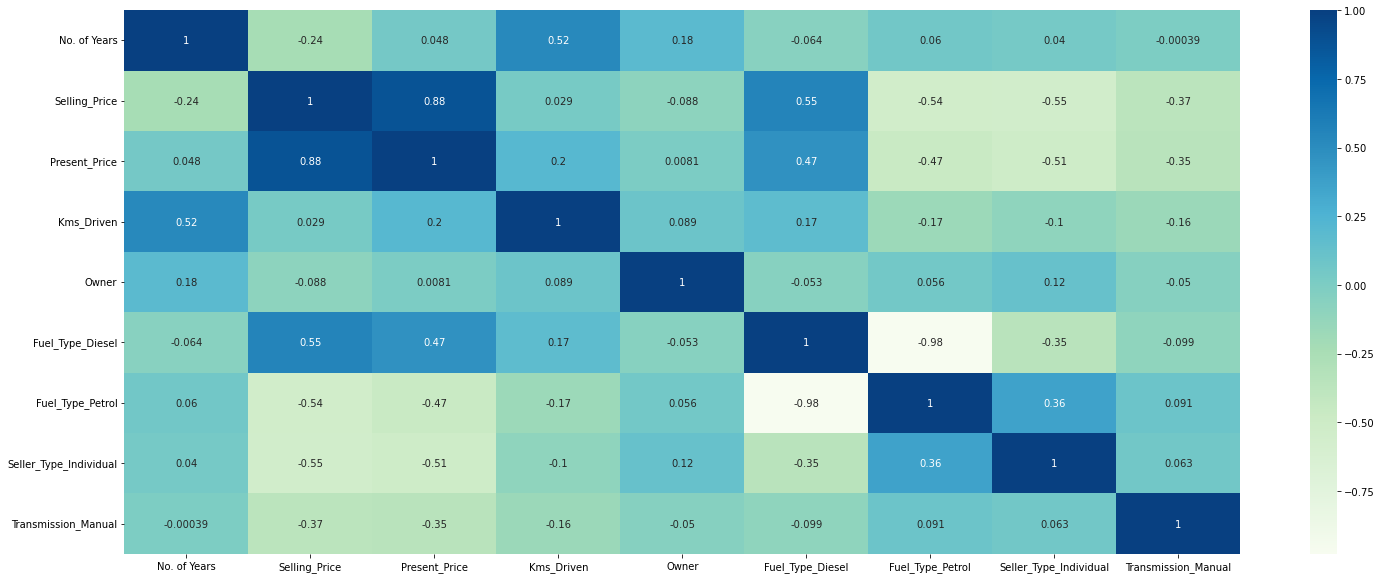

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#get correlations of each features in dataset
corrmat = car_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,10))
#plot heat map
g=sns.heatmap(car_df[top_corr_features].corr(),annot=True,cmap="GnBu")

- There is only two variable which are highly correlated that is selling_price and present_price

# Modelling

#### Feature Selection

In [15]:
columns = list(car_df.columns)
columns.remove('Selling_Price')
columns

['No. of Years',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [16]:
Y = car_df['Selling_Price']
X = car_df[columns]

In [17]:
X.head()

,No. of Years,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,5.59,27000,0,0,1,0,1
1,9,9.54,43000,0,1,0,0,1
2,5,9.85,6900,0,0,1,0,1
3,11,4.15,5200,0,0,1,0,1
4,8,6.87,42450,0,1,0,0,1


In [18]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [19]:
# Spliting the data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Selected Model - Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
# Creating the base model to tune
regressor = RandomForestRegressor()

###### *Hyperparameter Tunning*

In [21]:
# Using the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [23]:
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [24]:
# Random searching of parameters, using 5 fold cross validation, across 2880 combinations
model = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,
                            n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

##### Fitting the Model

In [25]:
model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [26]:
## Getting the best parameters of the model
model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

##### *Visulazing the Predictions*

In [27]:
## Predicting the Y for the test dataset
predicted_Y = model.predict(X_test)

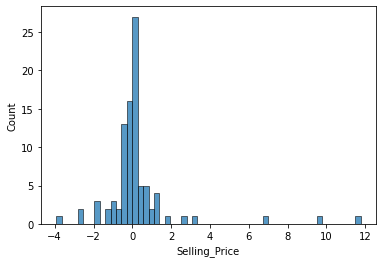

In [28]:
## Checking the Difference in the predicted_Y and Original Y 
sns.histplot(Y_test - predicted_Y)
plt.show()

- The difference is almost centered at 0 which tells that the prediction is very good

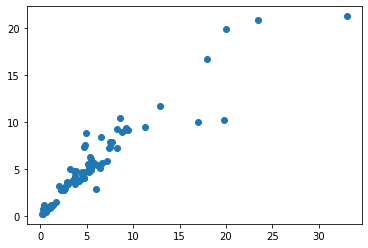

In [29]:
plt.scatter(Y_test, predicted_Y)
plt.show()

- The Data is almost linear which tells that predictions are good

###### *Score & Error*

In [30]:
## Exploring the Result of the Cross Validation
cv_result = pd.DataFrame(model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.972080,0.011428,0.464629,0.028071,900,5,5,sqrt,10,"{'n_estimators': 900, 'min_samples_split': 5, ...",0.822902,0.577396,0.795017,0.798710,0.892776,0.777360,0.105970,7
1,8.175569,2.122179,0.771525,0.067828,1100,10,2,sqrt,15,"{'n_estimators': 1100, 'min_samples_split': 10...",0.877032,0.653138,0.865873,0.820026,0.918695,0.826953,0.092411,3
2,2.390584,0.234626,0.303521,0.161452,300,100,5,auto,15,"{'n_estimators': 300, 'min_samples_split': 100...",0.735949,0.514956,0.511233,0.758261,0.662528,0.636585,0.105696,10
3,4.224576,0.164987,0.415196,0.148654,400,5,5,auto,15,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.960324,0.726788,0.572269,0.900282,0.932791,0.818491,0.147584,4
4,6.199253,0.261826,0.257980,0.053242,700,5,10,auto,20,"{'n_estimators': 700, 'min_samples_split': 5, ...",0.868241,0.553771,0.507457,0.717142,0.887589,0.706840,0.156212,8
5,5.788602,0.494514,0.294087,0.111789,1000,2,1,sqrt,25,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.956500,0.704846,0.940189,0.842054,0.952846,0.879287,0.096848,1
6,5.238435,0.195977,0.297959,0.094657,1100,15,10,sqrt,5,"{'n_estimators': 1100, 'min_samples_split': 15...",0.688155,0.461741,0.666573,0.652304,0.853432,0.664441,0.124514,9
7,1.125753,0.091766,0.096194,0.033375,300,15,1,sqrt,15,"{'n_estimators': 300, 'min_samples_split': 15,...",0.830160,0.628091,0.862682,0.801027,0.908594,0.806111,0.095915,6
8,3.715099,0.149662,0.132139,0.021448,700,10,2,sqrt,5,"{'n_estimators': 700, 'min_samples_split': 10,...",0.869283,0.632813,0.858372,0.803326,0.907677,0.814294,0.096688,5
9,2.028656,0.636180,0.116571,0.016725,700,15,1,auto,20,"{'n_estimators': 700, 'min_samples_split': 15,...",0.948390,0.819303,0.616628,0.830932,0.926766,0.828404,0.117482,2


In [31]:
scores = cv_result[['mean_test_score', 'std_test_score', 'rank_test_score']].copy()
scores.sort_values('rank_test_score', inplace = True)
scores

,mean_test_score,std_test_score,rank_test_score
5,0.879287,0.096848,1
9,0.828404,0.117482,2
1,0.826953,0.092411,3
3,0.818491,0.147584,4
8,0.814294,0.096688,5
7,0.806111,0.095915,6
0,0.777360,0.105970,7
4,0.706840,0.156212,8
6,0.664441,0.124514,9
2,0.636585,0.105696,10


In [32]:
## Score of the model
print('Score of the model is {:.2f} ± {:.2f}'.format(scores.iloc[0,0], scores.iloc[0,1]))

Score of the model is 0.88 ± 0.10


- The R2 value is close to 1 which indicates our model is good

In [33]:
from sklearn import metrics
print('MAE: {:.2f}'.format(metrics.mean_absolute_error(Y_test, predicted_Y)))

MAE: 0.88


- On a Average Model Predictions are only 0.88 away from actual value which is good.

## Final Model

In [34]:
print('Best Model: ', model.best_estimator_)
print('Score of the model: {:.2f} ± {:.2f}'.format(scores.iloc[0,0], scores.iloc[0,1]))
print('MAE: {:.2f}'.format(metrics.mean_absolute_error(Y_test, predicted_Y)))

Best Model:  RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)
Score of the model: 0.88 ± 0.10
MAE: 0.88
